# Geometry Manipulation Examples

This notebook contains examples for how to create and manipulate geometry objects in the Models API.

## Importing the necessary components

For these examples we will load all three major geometry objects: Points, Lines, and Polygons

In [1]:
from envelopegis.models.point import Point
from envelopegis.models.line import Line
from envelopegis.models.polygon import Polygon

## Creating geometries

Geometry objects can be constructed using several different types of inputs, the most common being x/y dictionaries and WKT strings. When creating a geometry object you must always specify a spatial reference for the geometry, usually "2263" (New York State Plane).

### Creating geometries using x/y dictionaries

One method of creating a geometry is to define points using python dictionaries, where each dictionary has an 'x' and 'y' entry representing the coordinates of a point. A single x/y dictionary can be used to create a `Point()` object, and a list of x/y dictionaries can be used to define the points in a `Line()` or `Polygon()` object.


In [2]:
# create some geometries using x/y dictionaries

# notice that all geometries take their spatial reference (2263) 
# as the second parameter to the object constructor

# first create some points
# (their variable names represent the 
# marker symbols we will use to render them later)
up_point = Point({'x': 1, 'y': 1}, 2263)
round_point = Point({'x': 2, 'y': 2}, 2263)
x_point = Point({'x': 3, 'y': 3}, 2263)
down_point = Point({'x': 4, 'y': 4}, 2263)

# next create a diagonal line using a list of dictionaries
diagonal_line = Line([
    {'x': 1, 'y': 1},
    {'x': 4, 'y': 4},
], 2263)

# finally, create a square polygon
square_polygon = Polygon([
    {'x': 1, 'y': 1},
    {'x': 4, 'y': 1},
    {'x': 4, 'y': 4},
    {'x': 1, 'y': 4},
], 2263)


### Creating Multipart Geometries

In some cases a geometry may consist of several lines or polygons that are maintained together as part of a multipart geometry. Constructing multipart geometries requires passing in nested lists of points, as in the following example.

Text(0.5, 1.0, 'Multipart polygon')

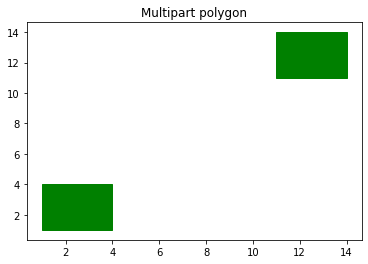

In [15]:
# create a multipart polygon
part_1_points = [
    {'x': 1, 'y': 1},
    {'x': 4, 'y': 1},
    {'x': 4, 'y': 4},
    {'x': 1, 'y': 4},
]

part_2_points = [
    {'x': 11, 'y': 11},
    {'x': 14, 'y': 11},
    {'x': 14, 'y': 14},
    {'x': 11, 'y': 14},
]

multipart_polygon = Polygon([part_1_points, part_2_points], 2263)
ax = multipart_polygon.plot(color='green')
ax.set_title('Multipart polygon')

### Creating polygons with interior rings

In some cases polygons have areas within their boundaries which are empty. These empty areas are called "interior rings" and can be created by passing a list of points representing the interior ring area with the other points that represent the polygon's exterior. The example below creates a polygon with an interior ring.

Text(0.5, 1.0, 'Polygon With Interior Ring')

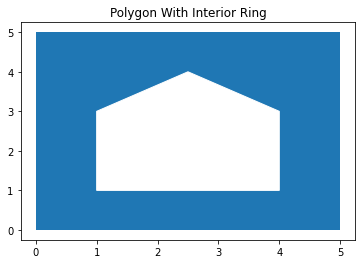

In [16]:
# create a polygon with an interior ring
# (notice that the list with the ring coordinates
# is passed along with the points of the polygon exterior)
ring_array = [{'x': 1, 'y': 1}, {'x': 4, 'y': 1}, {'x': 4, 'y': 3}, {'x': 2.5, 'y': 4}, {'x': 1, 'y': 3}]
polygon = Polygon([{'x': 0, 'y': 0}, {'x': 0, 'y': 5}, {'x': 5, 'y': 5}, {'x': 5, 'y': 0}, ring_array], 2263)

ax = polygon.plot()
ax.set_title('Polygon With Interior Ring')

### Creating geometries using WKT strings

WKT stands for "Well-Known Text" and is a standard for representing geometries as strings. Most applications and libraries that use geometric data can produce data in WKT format, and its common to use WKT to pass geometric data between varying applications. 

The geometry objects in the Models API can also be exported to WKT strings, and geometry objects can be constructed by passing a WKT string into the geometry's constructor.

In [5]:
# print out some WKT strings

print(up_point.wkt)
print(diagonal_line.wkt)
print(square_polygon.wkt)

POINT (1 1)
MULTILINESTRING ((1 1, 4 4))
MULTIPOLYGON (((1 1, 4 1, 4 4, 1 4, 1 1)))


In [6]:
# create geometries using WKT strings

wkt_point = Point('POINT (1 1)', 2263)
wkt_line = Line('MULTILINESTRING ((1 1, 4 4))', 2263)
wkt_polygon = Polygon('MULTIPOLYGON (((1 1, 4 1, 4 4, 1 4, 1 1)))', 2263)

## Plotting geometries

Once a geometry object is constructed it can be displayed using the `plot()` method. The `plot()` method uses the `matplotlib` library to render geometries and accepts most standard `matplotlib` inputs as parameters. 

The `plot()` method can be called with no arguments to render the geometry in it's own figure, or a `matplotlib.axes` object can be passed to the `plot()` method to render the geometry into an existing axes. The `plot()` method returns the `matplotlib.axes` object that the geometry has been rendered into so that other geometries can be rendered into the same axes.

Parameters for coloring and styling objects are defined in the `matplotlib` library and can be found in their documentation, specifically:

* [Point objects (uses `matplotlib.pyplot.scatter()` parameters)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)
* [Line objects (uses `matplotlib.pyplot.plot()` parameters)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
* [Polygon objects (uses `matplotlib.pyplot.fill()` parameters)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill.html?highlight=fill#matplotlib.pyplot.fill)

Once a geometry has been plotted, a label can be applied to the geometry using the `label()` method. The `label()` method accepts a string value for labeling the geometry, as well as any parameters that can be provided to the `matplotlib` library for rendering text.

Specific parameters for aligning, coloring , and styling labels can be found in the `matplotlib` documentation here:

* [matplotlib text properties](https://matplotlib.org/stable/tutorials/text/text_props.html)

Text(0.5, 1.0, 'Shape Examples')

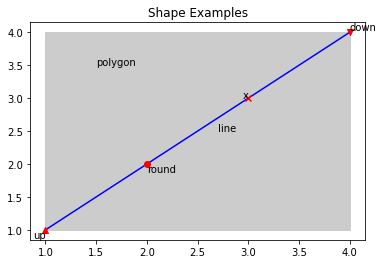

In [7]:
# plot the square polygon and grab
# the axes that it is drawn in
ax = square_polygon.plot(color='0.8')

# draw the diagonal line across the square
# by providing the axes object
diagonal_line.plot(ax=ax, color='Blue') 

# draw the points using various markers
# (notice the `zorder` parameter that insures the
# points are rendered on top of the other shapes)
up_point.plot(ax=ax, marker='^', zorder=3, color='Red')
round_point.plot(ax=ax, marker='o', zorder=3, color='Red')
x_point.plot(ax=ax, marker='x', zorder=3, color='Red')
down_point.plot(ax=ax, marker='v', zorder=3, color='Red')

# label the markers and 
# override some of their alignment properties
up_point.label('up', ha='right', va='top')
round_point.label('round', va='top')
x_point.label('x', ha='right')
down_point.label('down')

# label the line and set the 
# xy based on the midpoint of the line
line_midpoint = diagonal_line.midpoint
label_point = line_midpoint.transform(0.2, 0)
diagonal_line.label('line', xy=label_point)

# label the polygon and override the xy point for the label
label_point = Point({'x': 1.5, 'y': 3.5}, 2263)
square_polygon.label('polygon', xy=label_point)

# use the axes object to give
# the drawing a title
ax.set_title('Shape Examples')

## Comparing and analyzing geometries

Geometry objects in the Models API have numerous methods for comparing geometry objects to one another to understand their spatial relationships, as well as methods for inspecting geometries to determine their properties.

### Comparing geometries

Geometries can be compared to one another in order to understand the spatial relationships between the shapes. Some examples of geometry comparisons are below.

#### Intersects, contains, and within

Text(0.5, 1.0, 'Polygon intersects point: False\nPolygon contains point: False\nPoint within polygon: False')

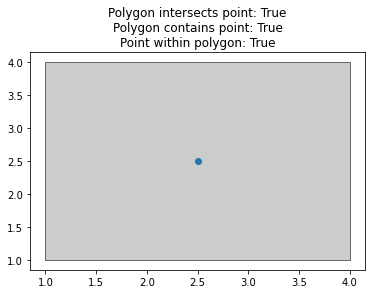

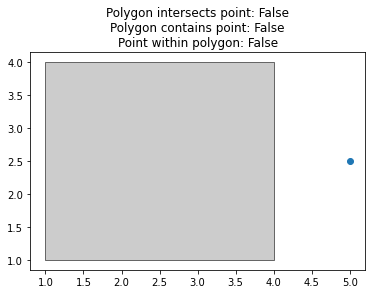

In [8]:
# create some geometries to compare to one another
square_polygon = Polygon([
    {'x': 1, 'y': 1},
    {'x': 4, 'y': 1},
    {'x': 4, 'y': 4},
    {'x': 1, 'y': 4},
], 2263)

point_in_poly = Point({'x': 2.5, 'y': 2.5}, 2263)
point_outside_poly = Point({'x': 5, 'y': 2.5}, 2263)

# now let's compare the geometries and output the results
# first the contained point
intersects = square_polygon.intersects(point_in_poly)
contains = square_polygon.contains(point_in_poly)
within = point_in_poly.within(square_polygon)

ax = square_polygon.plot(color='0.8', edgecolor='0.4')
point_in_poly.plot(ax=ax, zorder=2)
ax.set_title('Polygon intersects point: {}\nPolygon contains point: {}\nPoint within polygon: {}'.format(intersects, contains, within))

# now the outside point
intersects = square_polygon.intersects(point_outside_poly)
contains = square_polygon.contains(point_outside_poly)
within = point_outside_poly.within(square_polygon)

ax = square_polygon.plot(color='0.8', edgecolor='0.4')
point_outside_poly.plot(ax=ax, zorder=2)
ax.set_title('Polygon intersects point: {}\nPolygon contains point: {}\nPoint within polygon: {}'.format(intersects, contains, within))


#### Touching, crossing, and disjoint

Text(0.5, 1.0, 'Line touches: False\nLine crosses: False\nLine is disjoint: True')

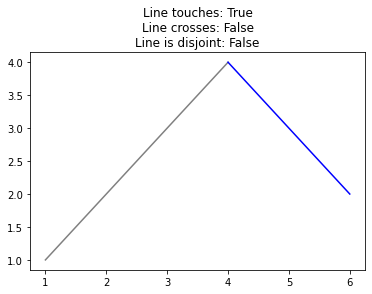

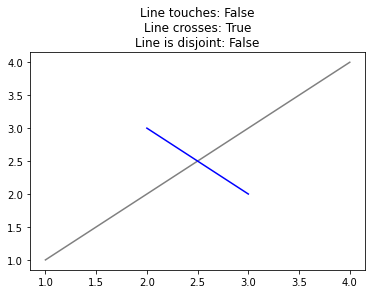

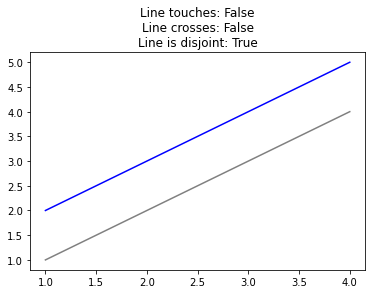

In [9]:
# now let's examine some more methods using `Line()` objects

diagonal_line = Line([
    {'x': 1, 'y': 1},
    {'x': 4, 'y': 4},
], 2263)
touching_line = Line([
    {'x': 6, 'y': 2},
    {'x': 4, 'y': 4},
], 2263)
crossing_line = Line([
    {'x': 2, 'y': 3},
    {'x': 3, 'y': 2},
], 2263)
disjoint_line = Line([
    {'x': 1, 'y': 2},
    {'x': 4, 'y': 5},    
], 2263)

# analyze the touching line
touches = diagonal_line.touches(touching_line)
crosses = diagonal_line.crosses(touching_line)
disjoint = diagonal_line.disjoint(touching_line)

ax = diagonal_line.plot(color='Grey')
touching_line.plot(ax=ax, color='Blue')
ax.set_title('Line touches: {}\nLine crosses: {}\nLine is disjoint: {}'.format(touches, crosses, disjoint))

# analyze the crossing line
touches = diagonal_line.touches(crossing_line)
crosses = diagonal_line.crosses(crossing_line)
disjoint = diagonal_line.disjoint(crossing_line)

ax = diagonal_line.plot(color='Grey')
crossing_line.plot(ax=ax, color='Blue')
ax.set_title('Line touches: {}\nLine crosses: {}\nLine is disjoint: {}'.format(touches, crosses, disjoint))

# analyze the disjoint line
touches = diagonal_line.touches(disjoint_line)
crosses = diagonal_line.crosses(disjoint_line)
disjoint = diagonal_line.disjoint(disjoint_line)

ax = diagonal_line.plot(color='Grey')
disjoint_line.plot(ax=ax, color='Blue')
ax.set_title('Line touches: {}\nLine crosses: {}\nLine is disjoint: {}'.format(touches, crosses, disjoint))